##  Comparision of  Machine learning-based 3D Probabilistic Hydrofacies Models for Improved Aquifer Paramaterizations 
### Nafyad Kawo (2022/12/10)

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset and Preprocessing

In [2]:
dataset = pd.read_csv('200Cat13_AEMfinal.csv')
SCI_smoothAEM = pd.read_csv('SCI_Smooth.csv',sep=';')
print(dataset.head())
print(dataset['Litho_code'].unique())

   Easting     Northing  Elevation     Roh  Litho_code
0   727400  195934.5238   381.9397   9.696           1
1   727600  195934.5238   381.9397   9.842           1
2   727400  196135.7143   381.9397   9.488           1
3   727600  196135.7143   381.9397  10.043           1
4   729400  199757.1429   381.9397  12.480           0
[1 0]


In [3]:
dataset.shape

(15380, 5)

In [4]:
dataset1= dataset.rename(columns={"Roh": "AEM_resistivity", "Litho_code": "litho_groupcode"})

In [5]:
dataset1

,Easting,Northing,Elevation,AEM_resistivity,litho_groupcode
0,727400,195934.5238,381.939700,9.696000,1
1,727600,195934.5238,381.939700,9.842000,1
2,727400,196135.7143,381.939700,9.488000,1
3,727600,196135.7143,381.939700,10.043000,1
4,729400,199757.1429,381.939700,12.480000,0
...,...,...,...,...,...
15375,701200,202171.4286,526.586525,12.392838,0
15376,699800,203579.7619,526.586525,12.493603,0
15377,699800,203780.9524,526.586525,12.006178,0
15378,699800,203579.7619,529.600000,12.688493,0


In [6]:
dataset1.columns

Index(['Easting', 'Northing', 'Elevation', 'AEM_resistivity',
       'litho_groupcode'],
      dtype='object')

In [7]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15380 entries, 0 to 15379
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Easting          15380 non-null  int64  
 1   Northing         15380 non-null  float64
 2   Elevation        15380 non-null  float64
 3   AEM_resistivity  15380 non-null  float64
 4   litho_groupcode  15380 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 600.9 KB


In [9]:
SCI_smoothAEM.describe().T

,count,mean,std,min,25%,50%,75%,max
X,1626627.0,719555.478668,9978.117443,697400.000000,711800.000000,720000.000000,728000.000000,736400.000000
Y,1626627.0,199160.972656,4547.355005,190100.000000,195129.761905,199757.142857,202976.190476,207000.000000
Z,1626627.0,327.753656,110.841365,104.700000,234.279433,327.697163,424.128369,529.600000
Value,1626627.0,12.510549,4.992818,2.905932,9.791779,11.534251,13.717045,79.029228


In [11]:
dataset1.describe().T

,count,mean,std,min,25%,50%,75%,max
Easting,15380.0,719932.912874,10006.707483,698600.000000,712200.00000,721000.0000,729000.00000,735600.0000
Northing,15380.0,199313.765095,4291.340930,191105.952400,195733.33330,200360.7143,202976.19050,206195.2381
Elevation,15380.0,455.186161,37.858398,177.023404,439.19570,457.2766,478.37090,529.6000
AEM_resistivity,15380.0,18.598385,7.326967,5.417000,13.62675,16.8130,21.54925,60.5160
litho_groupcode,15380.0,0.340897,0.474026,0.000000,0.00000,0.0000,1.00000,1.0000


In [10]:
dataset1['AEM_resistivity'].describe().T

count    15380.000000
mean        18.598385
std          7.326967
min          5.417000
25%         13.626750
50%         16.813000
75%         21.549250
max         60.516000
Name: AEM_resistivity, dtype: float64

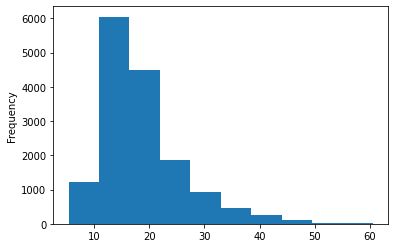

In [12]:
# Check the distribution of the AEM Resistivity column with a histogram
dataset1.AEM_resistivity.plot.hist();
 

### Spliting data into features and target

In [25]:
X = dataset1.iloc[:, :-1].values
y = dataset1.iloc[:, -1].values


In [26]:
ytraget=dataset1.iloc[:, -1]


In [27]:
ytraget

0        1
1        1
2        1
3        1
4        0
        ..
15375    0
15376    0
15377    0
15378    0
15379    0
Name: litho_groupcode, Length: 15380, dtype: int64

### Splitting the dataset into the Training set and Test set 


In [28]:
#The stratify parameter  preserves the proportion of  data (how data are distributed in the target column) - and depicts that same proportion of distribution in the train_test_split (https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,shuffle=True, random_state = 0,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(12304, 4)
(3076, 4)
(12304,)
(3076,)


### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier



In [35]:
## RandomizedSearchCV to tune HP
from sklearn.model_selection import RandomizedSearchCV

In [36]:
## Hyperparameters to tune MLP(https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
param_gridMLP = {
    'hidden_layer_sizes': [(10,25),(40,50,5),(20,100,10),(30,20),(60,40,10),(64,100,20),(20,10,10),(50,30,20),(160,100,40),(200,100,60,40,20),(160,80,30,40,10), (160,100,60,40,20),(100,80,50,20)],
    'max_iter': [50, 100, 200, 350, 400, 560, 700, 900, 1200,1600, 2000,3000,6000],
    'activation': ['tanh', 'identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.001, 0.05, 0.1],
    'learning_rate_init': [0.0001,0.0005,0.001, 0.005,0.01],
    'learning_rate': ['constant','adaptive']
}



In [37]:
mlp1=MLPClassifier()

In [38]:
# tune MLPclassifier
gridMLP = RandomizedSearchCV(mlp1, param_distributions=param_gridMLP, n_jobs= -1,verbose = 1, cv=10, scoring = 'average_precision')
gridMLP.fit(X_train,y_train)
YpredMLP =gridMLP.predict(X_test)
YpredMLP_pro=gridMLP.predict_proba(X_test)
#Printing the best hyperparameters
print('The MLG best hyper parameters are:\n',gridMLP.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
The MLG best hyper parameters are:
 {'solver': 'adam', 'max_iter': 900, 'learning_rate_init': 0.01, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (160, 100, 40), 'alpha': 0.05, 'activation': 'tanh'}


In [127]:
# Import model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import ConfusionMatrixDisplay

In [128]:
### building MLP model with best parameters
MLPCa = MLPClassifier(hidden_layer_sizes=(160,100,40),max_iter = 2000,activation = 'tanh',solver = 'adam',alpha= 0.0001,learning_rate= 'constant',random_state = 0)

In [129]:
MLPCa.fit(X_train,y_train)
YpredMLPCa =MLPCa.predict(X_test)
YpredMLPCa_pro=MLPCa.predict_proba(X_test)

In [131]:
#grid search
XGB = XGBClassifier(random_state=0)
n_estimators = [100, 200, 300, 400, 500,600,700,800,900,1000,1500,2000,3000]
max_depth = [2,3,4,6,7,8,10,15,20,35]
learning_rate = [0.0001, 0.001, 0.01, 0.1,0.3,0.5]
min_child_weight=[6,8,10,12]
gamma=[i/10.0 for i in range(0,5)]
subsample= [0.5, 0.6, 0.7, 0.8, 0.9]
colsample_bytree= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
colsample_bylevel= [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,colsample_bylevel=colsample_bylevel,gamma=gamma)
grid_XGB = RandomizedSearchCV(XGB, param_distributions= param_grid,n_jobs=-1, cv=10,scoring= 'average_precision')
XGB_grid = grid_XGB.fit(X_train, y_train)
#Printing the best hyperparameters
print('The XGBoost best hyper parameters are:\n',XGB_grid.best_params_)

The XGBoost best hyper parameters are:
 {'subsample': 0.8, 'n_estimators': 800, 'min_child_weight': 8, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}


In [132]:
### Building XGBoost with best Prameters
XGB = XGBClassifier(subsample= 0.5, n_estimators=900, min_child_weight=10, max_depth=10, learning_rate= 0.3, gamma=0.0, colsample_bytree=0.9, colsample_bylevel= 0.4)

In [133]:
YpredXGB =grid_XGB.predict(X_test)
YpredXGB_pro=grid_XGB.predict_proba(X_test)

In [134]:
XGB_hy =XGBClassifier(subsample= 0.5, n_estimators=900, min_child_weight=10, max_depth=10, learning_rate= 0.3, gamma=0.0, colsample_bytree=0.9, colsample_bylevel= 0.4)

In [135]:
XGB_grid1 = XGB_hy.fit(X_train, y_train)

In [136]:
## #Setting values for the Gradientboosting Classifier parameters (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
parametersGBC = {
    "n_estimators":np.arange(10, 1000, 20),
    "max_depth":np.arange(6, 100, 10),
    "learning_rate":[0.0001,0.001,0.01,0.1,1],
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(2, 10, 2)
                                      }

In [137]:
### tune GBC
Grid_GBC = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parametersGBC,cv=10, scoring= 'average_precision', n_jobs=-1)
Grid_GBC.fit(X_train, y_train)
YpredGBC =Grid_GBC.predict(X_test)
YpredGBC_pro=Grid_GBC.predict_proba(X_test)
#Printing the best hyperparameters
print('The GBC best hyper parameters are:\n',Grid_GBC.best_params_)


The GBC best hyper parameters are:
 {'n_estimators': 710, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 86, 'learning_rate': 0.1}


In [292]:
### Building GBC with best parameters
GBC=GradientBoostingClassifier(n_estimators=710, min_samples_split=6, min_samples_leaf= 2, max_depth=86, learning_rate=0.1)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=86, min_samples_leaf=2,
                           min_samples_split=6, n_estimators=710)

In [139]:
#Setting values for the  RF parameters 
ParameterRF ={  "n_estimators ": np.arange(100, 1000, 10),
                 "max_depth":np.arange(5, 100, 10),
                 "min_samples_split": np.arange (2, 20, 2),
                 "min_samples_leaf":np.arange(2, 10, 1),
                 "criterion":['gini','entropy'],
                 "max_features" :['auto', 'sqrt']
}


In [140]:
RandomForestClassifier1=RandomForestClassifier()

In [141]:
#Setting values for the parameters
n_estimators = np.arange(100, 1000, 10)
max_depth =np.arange(5, 100, 20)
min_samples_split = np.arange (2, 20, 2)
min_samples_leaf = np.arange(2, 20, 2)
criterion =['gini','entropy']
max_features = ['auto', 'sqrt']
#Creating a dictionary for the hyper parameters
hyper_rf = dict(n_estimators = n_estimators, max_depth = max_depth, 
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf,criterion = criterion,max_features = max_features)

#Applying RandomSearchCV to get the best value for hyperparameters
grid_RF= RandomizedSearchCV(RandomForestClassifier1, param_distributions= hyper_rf, cv = 10, verbose = 1,scoring= 'average_precision', n_jobs = -1)
bestrf = grid_RF.fit(X_train, y_train)
YpredRF =grid_RF.predict(X_test)
YpredRF_pro=grid_RF.predict_proba(X_test)
#Printing the best hyperparameters
print('The RF best hyper parameters are:\n',grid_RF.best_params_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
The RF best hyper parameters are:
 {'n_estimators': 310, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 65, 'criterion': 'gini'}


In [142]:
RF = RandomForestClassifier(n_estimators=250, min_samples_split=12, min_samples_leaf=2, max_features= 'sqrt', max_depth=45, criterion='entropy',random_state=42)

In [143]:
RF

RandomForestClassifier(criterion='entropy', max_depth=45, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12,
                       n_estimators=250, random_state=42)

In [144]:
rf12 = RandomForestClassifier(max_depth=50,min_samples_leaf=1, min_samples_split=2, n_estimators =400,criterion ='entropy',max_features ='auto',bootstrap = False,random_state=42)
rf12.fit(X_train,y_train)
pred_rf13 = rf12.predict(X_test)

In [188]:
y_predRF =  rf12.predict_proba(X_test)[:, 1]

## Stacked model

In [165]:
estimator_list = [
    ('MLP',MLPCa),
    ('XGB',XGB),
    ('rf12',rf12),
    ('GBC',GBC),
         ]
metaclassifier = LogisticRegression(random_state=123)
#Grid_GBC = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=parametersGBC,cv=10)
LRStack = StackingClassifier(
    estimators=estimator_list, final_estimator= metaclassifier,cv=10)



In [166]:
# Train
LRStack.fit(X_train, y_train)
# Make predictions for test data
y_test_predLR = LRStack.predict(X_test)

In [248]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    F1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "F1": round(F1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {F1:.2f}")
    
    return metric_dict

In [251]:
XGB_metrics = evaluate_preds(y_test, YpredXGB)



Acc: 84.43%
Precision: 0.80
Recall: 0.73
F1 score: 0.76


In [252]:
GRB_metrics = evaluate_preds(y_test, YpredGBC)


Acc: 90.57%
Precision: 0.87
Recall: 0.85
F1 score: 0.86


In [253]:
RF1_metrics = evaluate_preds(y_test, pred_rf13)

Acc: 90.44%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


In [254]:
StackGBC_finalestimator_metrics = evaluate_preds(y_test, y_test_predLR)

Acc: 91.03%
Precision: 0.88
Recall: 0.85
F1 score: 0.87


([<matplotlib.axis.YTick at 0x2f114171288>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

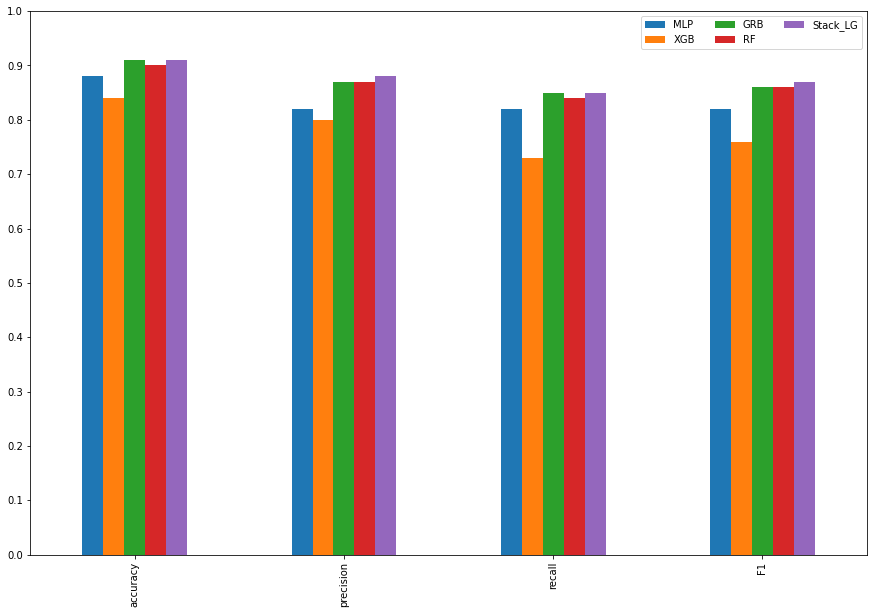

In [261]:
compare_metrics = pd.DataFrame({"MLP": Mlp_metrics,
                                "XGB": XGB_metrics,
                                "GRB": GRB_metrics,
                                "RF": RF1_metrics,
                                "Stack_LG": StackGBC_finalestimator_metrics
                               })

compare_metrics.plot.bar(figsize=(15, 10));
plt.legend(ncol=3)
plt.yticks(np.arange(0, 1.1, step=0.1))

In [176]:
compare_metrics

,MLP,XGB,GRB,RF,Stack_LG
accuracy,0.88,0.84,0.91,0.90,0.91
precision,0.82,0.80,0.87,0.87,0.88
recall,0.82,0.73,0.85,0.84,0.85
f1,0.82,0.76,0.86,0.86,0.87


In [183]:
y_predxgb = XGB_grid.predict_proba(X_test)[:, 1]

In [184]:
y_predxgb

array([5.36408799e-04, 4.07102138e-01, 1.98928148e-01, ...,
       7.19027638e-01, 1.19074444e-04, 2.70865089e-03], dtype=float32)

In [187]:
y_pred = LRStack.predict_proba(X_test)[:, 1]

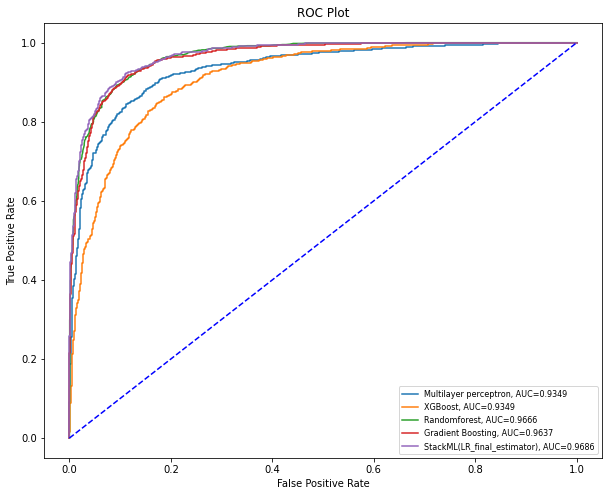

In [262]:
## https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
#from sklearn.metrics import RocCurveDisplay
from sklearn import metrics
#set up plotting area
plt.figure(0,figsize=(10, 8)).clf()
# plot ROC curve for MLP
y_pred = MLPCa.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Multilayer perceptron, AUC="+str(auc))
# plot ROC curve for XGB
#y_pred = XGB_grid.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predxgb)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))
#fit gradient boosted model and plot ROC curve
y_pred = rf12.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Randomforest, AUC="+str(auc))
y_pred = Grid_GBC.predict_proba(X_test)[:, 1]       ## keep probabilities for the positive outcome only
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))
#fit stackML model (LR as final estimator) and plot ROC curve
y_pred = LRStack.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="StackML(LR_final_estimator), AUC="+str(auc))
#fit stackML model (LR as final estimator) and plot ROC curve
plt.plot([0,1],[0,1], color='blue',linestyle='--')
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#add legend
plt.legend(fontsize=8)

In [228]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "MLP": MLPClassifier(hidden_layer_sizes=(160,100,40),max_iter = 2000,activation = 'tanh',solver = 'adam',alpha= 0.0001,learning_rate= 'constant',random_state = 0),
    "RF": RandomForestClassifier(max_depth=50,min_samples_leaf=1, min_samples_split=2, n_estimators =400,criterion ='entropy',max_features ='auto',bootstrap = False,random_state=42),
    "XGB": XGBClassifier(subsample= 0.5, n_estimators=900, min_child_weight=10, max_depth=10, learning_rate= 0.3, gamma=0.0, colsample_bytree=0.9, colsample_bylevel= 0.4),
    "GBC": GradientBoostingClassifier(n_estimators=710, min_samples_split=6, min_samples_leaf= 2, max_depth=86, learning_rate=0.1),
    "LRStack":StackingClassifier(estimators=estimator_list, final_estimator= metaclassifier,cv=10),
}



In [206]:
from sklearn.metrics import confusion_matrix
cf_matrix = dict.fromkeys(classifiers.keys())
for key, classifier in classifiers.items(): 
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix[key]=confusion_matrix(y_test, y_pred)

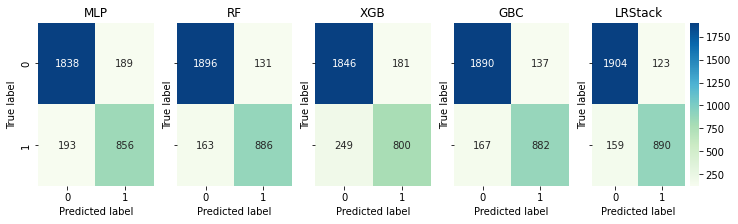

In [236]:
fig, axn = plt.subplots(1,5, sharex=True, sharey=True,figsize=(12,3))

for i, ax in enumerate(axn.flat):
    k = list(cf_matrix)[i]
    sns.heatmap(cf_matrix[k],annot=True, ax=ax,fmt='g',cmap="GnBu",cbar=i==4)
    ax.set_title(k,fontsize=12)
    ax.set_xlabel('Predicted label')     
    ax.yaxis.set_label_text('True label')